In [1]:
pwd

'C:\\Users\\HP\\OneDrive\\Desktop\\Test Jupyter'

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('xAPI-Edu-Data.csv')
dataset.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df = dataset[['gender','PlaceofBirth','StageID','Topic','raisedhands','VisITedResources','AnnouncementsView','Discussion', 'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays', 'Class']]
df.head()

,gender,PlaceofBirth,StageID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,lowerlevel,IT,15,16,2,20,Yes,Good,Under-7,M
1,M,KuwaIT,lowerlevel,IT,20,20,3,25,Yes,Good,Under-7,M
2,M,KuwaIT,lowerlevel,IT,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,lowerlevel,IT,30,25,5,35,No,Bad,Above-7,L
4,M,KuwaIT,lowerlevel,IT,40,50,12,50,No,Bad,Above-7,M


In [6]:
df.groupby(['ParentschoolSatisfaction'])['Class'].value_counts(normalize=True)

ParentschoolSatisfaction  Class
Bad                       L        0.446809
                          M        0.425532
                          H        0.127660
Good                      M        0.448630
                          H        0.404110
                          L        0.147260
Name: Class, dtype: float64

In [7]:
df.groupby(['ParentAnsweringSurvey'])['ParentschoolSatisfaction'].value_counts(normalize=True)

ParentAnsweringSurvey  ParentschoolSatisfaction
No                     Bad                         0.690476
                       Good                        0.309524
Yes                    Good                        0.840741
                       Bad                         0.159259
Name: ParentschoolSatisfaction, dtype: float64

In [8]:
df.groupby(['ParentAnsweringSurvey'])['Class'].value_counts(normalize=True)

ParentAnsweringSurvey  Class
No                     L        0.471429
                       M        0.395238
                       H        0.133333
Yes                    M        0.474074
                       H        0.422222
                       L        0.103704
Name: Class, dtype: float64

In [9]:
df2 = dataset[['gender','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays', 'Class']]
df2.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,15,16,2,20,Under-7,M
1,M,20,20,3,25,Under-7,M
2,M,10,7,0,30,Above-7,L
3,M,30,25,5,35,Above-7,L
4,M,40,50,12,50,Above-7,M


In [10]:
df2['raisedhands'] = pd.cut(df2.raisedhands, bins=3, labels=np.arange(3), right=False)
df2.groupby(['raisedhands'])['Class'].value_counts(normalize=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1912583230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['raisedhands'] = pd.cut(df2.raisedhands, bins=3, labels=np.arange(3), right=False)


raisedhands  Class
0            L        0.534314
             M        0.392157
             H        0.073529
1            M        0.577778
             H        0.288889
             L        0.133333
2            H        0.543011
             M        0.424731
             L        0.032258
Name: Class, dtype: float64

In [11]:
df2['VisITedResources'] = pd.cut(df2.VisITedResources, bins=3, labels=np.arange(3), right=False)
df2.groupby(['VisITedResources'])['Class'].value_counts(normalize=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\2179091185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VisITedResources'] = pd.cut(df2.VisITedResources, bins=3, labels=np.arange(3), right=False)


VisITedResources  Class
0                 L        0.656250
                  M        0.293750
                  H        0.050000
1                 M        0.560976
                  H        0.231707
                  L        0.207317
2                 M        0.495798
                  H        0.483193
                  L        0.021008
Name: Class, dtype: float64

In [12]:
df2['AnnouncementsView'] = pd.cut(df2.AnnouncementsView, bins=3, labels=np.arange(3), right=False)
df2.groupby(['AnnouncementsView'])['Class'].value_counts(normalize=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\540185014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AnnouncementsView'] = pd.cut(df2.AnnouncementsView, bins=3, labels=np.arange(3), right=False)


AnnouncementsView  Class
0                  L        0.468354
                   M        0.388186
                   H        0.143460
1                  M        0.506667
                   H        0.393333
                   L        0.100000
2                  H        0.526882
                   M        0.462366
                   L        0.010753
Name: Class, dtype: float64

In [13]:
df2['Discussion'] = pd.cut(df2.Discussion, bins=3, labels=np.arange(3), right=False)
df2.groupby(['Discussion'])['Class'].value_counts(normalize=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1856830132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Discussion'] = pd.cut(df2.Discussion, bins=3, labels=np.arange(3), right=False)


Discussion  Class
0           M        0.416290
            L        0.371041
            H        0.212670
1           M        0.538462
            H        0.253846
            L        0.207692
2           H        0.480620
            M        0.379845
            L        0.139535
Name: Class, dtype: float64

In [14]:
df2.groupby(['StudentAbsenceDays'])['Class'].value_counts(normalize=True)

StudentAbsenceDays  Class
Above-7             L        0.607330
                    M        0.371728
                    H        0.020942
Under-7             M        0.484429
                    H        0.477509
                    L        0.038062
Name: Class, dtype: float64

In [15]:
df2 = dataset[['gender','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays', 'Class']]
df2.tail()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
475,F,5,4,5,8,Above-7,L
476,F,50,77,14,28,Under-7,M
477,F,55,74,25,29,Under-7,M
478,F,30,17,14,57,Above-7,L
479,F,35,14,23,62,Above-7,L


In [16]:
correlation = df2[['raisedhands','VisITedResources','AnnouncementsView','Discussion']].corr(method='pearson')
correlation

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [17]:
df2 = pd.concat([df2,pd.get_dummies(df2['gender'], prefix='gender_')], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['StudentAbsenceDays'], prefix='absence_')], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Class'], prefix='class_')], axis=1)

df2.drop(['gender'], axis = 1,inplace=True)
df2.drop(['StudentAbsenceDays'], axis = 1,inplace=True)
df2.drop(['Class'], axis = 1,inplace=True)

df2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender__F,gender__M,absence__Above-7,absence__Under-7,class__H,class__L,class__M
0,15,16,2,20,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,1,0,0,1
2,10,7,0,30,0,1,1,0,0,1,0
3,30,25,5,35,0,1,1,0,0,1,0
4,40,50,12,50,0,1,1,0,0,0,1


In [18]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [19]:
X = df2[['raisedhands', 'VisITedResources']].values
#NORMALIZE OUR ARRAY
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
#GET X AXIS
X = pd.DataFrame(x_scaled).values
X[:5]

array([[0.15      , 0.16161616],
       [0.2       , 0.2020202 ],
       [0.1       , 0.07070707],
       [0.3       , 0.25252525],
       [0.4       , 0.50505051]])

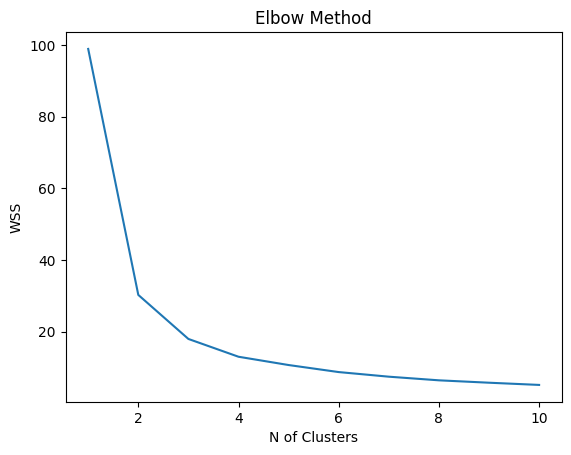

In [20]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    #print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('N of Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

KMeans(n_clusters=3)

In [24]:
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_

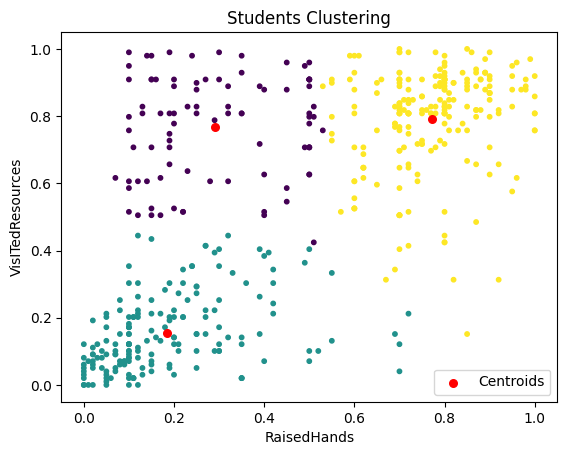

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red',label = 'Centroids')
plt.title('Students Clustering')
plt.xlabel('RaisedHands')
plt.ylabel('VisITedResources')
plt.legend()

plt.show()

In [25]:
df3 = dataset[['raisedhands','VisITedResources','AnnouncementsView','Discussion','Class']]
df3.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


In [26]:
y = df3['Class'].values
y[0:5]

array(['M', 'M', 'L', 'L', 'M'], dtype=object)

In [27]:
X = df3[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].values
X= preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[-1.03342931, -1.17407456, -1.35116659, -0.84332615],
       [-0.87081258, -1.05302945, -1.31354928, -0.66222533],
       [-1.19604604, -1.44642607, -1.4264012 , -0.48112451],
       [-0.54557912, -0.90172306, -1.23831467, -0.30002369],
       [-0.22034567, -0.14519109, -0.97499354,  0.24327877]])

For checking accurcy we can used following algorithm

K Nearest Neighbor(KNN)

Decision Tree

Support Vector Machine

Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384, 4) (384,)
Test set: (96, 4) (96,)


KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6458333333333334 with k= 4


In [30]:
#REBUILDING THE MODEL WITH BEST K
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Dtree.fit(X_train,y_train)
Dtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Support Vector Machine (SVM)

In [32]:
from sklearn import svm
supMac = svm.SVC(kernel='rbf', gamma='auto')
supMac.fit(X_train, y_train) 

SVC(gamma='auto')

Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear', multi_class='auto').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [34]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
knn_yhat = neigh.predict(X_test)
print("KNN jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.65
KNN F1-score: 0.64

In [ ]:
dtree_yhat = Dtree.predict(X_test)
print("Decision Tree Jaccard index: %.2f" % jaccard_score(y_test, dtree_yhat))
print("Decision Tree F1-score: %.2f" % f1_score(y_test, dtree_yhat, average='weighted') )

Decision Tree Jaccard index: 0.59
Decision Tree F1-score: 0.60

In [ ]:
svm_yhat = supMac.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, svm_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, svm_yhat, average='weighted') )

SVM Jaccard index: 0.60
SVM F1-score: 0.60

In [ ]:
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.62
LR F1-score: 0.61
LR LogLoss: 0.90